Code that reproduces geotherm models from Rudnick's paper (https://www.sciencedirect.com/science/article/pii/S0009254197001514).

In [58]:
from numpy import arange, nan
from matplotlib import pylab as plt
%matplotlib inline
plt.style.use('ggplot')

alpha = 2.9e-5
Tp = 1350.0
g = 9.8
cp = 1250.0

def propagate_solution(tt,qt,k,dz,rhoH):
    tb = tt + qt/k * dz - rhoH * (dz)**2 / ( 2.*k )
    qb = qt - rhoH*dz
    
    return tb, qb
    
def example(t0=30, q0=41e-3, rhoH_crust = 0.5e-6, rhoH_lith = 0.03e-6):
    
    tb=t0
    qb=q0
    dz=1.0
    zmax=450
    
    depths = arange(0,zmax,dz)
    temps = []
    qs = []
    
    for z in depths:
        if z < 41/3:
            rhoH=rhoH_crust * 0.6 * 3
            k=2.7
        elif z < 2*41/3:
            rhoH=rhoH_crust * 0.34 * 3
            k=2.7
        elif z < 3*41/3:
            rhoH=rhoH_crust * 0.06 * 3
            k=2.7
        else:
            rhoH=rhoH_lith
            k=1./(0.174+0.000265*tb) + (3.68e-10) * (tb)**3
        
        tb,qb = propagate_solution(tt=tb,qt=qb,k=k,dz=dz*1000,rhoH=rhoH)
        
        tad = Tp * (1. + alpha*g*z*1000/cp)
        if tb > tad:
            temps.append(tad)
        elif qb < 0.0:
            temps.append(nan)
        else:
            temps.append(tb)
        qs.append(qb)
        
    plt.plot(temps,depths,lw=3, label = "%.1f $\mu$W/m$^3$" % (rhoH_crust*10**6) )
    plt.ylim(zmax,0)
    
    return depths, temps

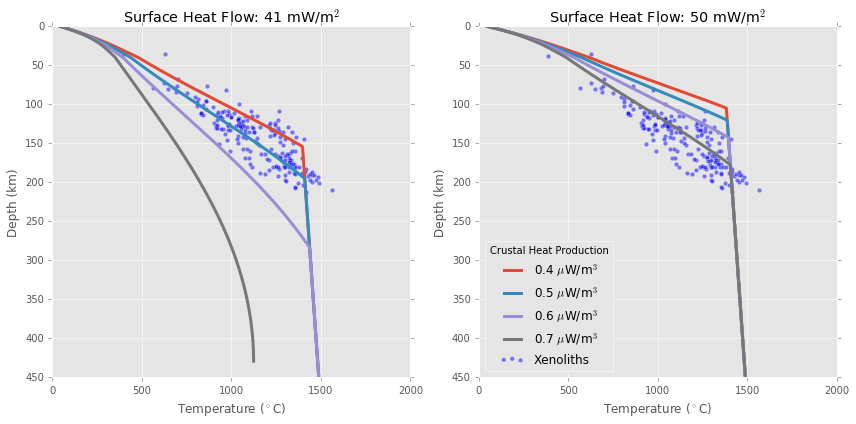

In [59]:
plt.figure(figsize=(12,6))
for iplt, q0 in enumerate([41e-3, 50e-3]):
    plt.subplot(1,2,iplt+1)
    for rhoH_crust in [0.4e-6, 0.5e-6, 0.6e-6, 0.7e-6]:
        _,_=example(rhoH_crust = rhoH_crust, q0=q0)

    plt.xlim(0,2000)
    _,_=plt.ylabel('Depth (km)'), plt.xlabel('Temperature ($^\circ$C)')
    _ = plt.title('Surface Heat Flow: %2d mW/m$^2$' % (q0*1000))
    
    import pandas as pd
    df = pd.read_csv('Xenolith_geotherm_cad.csv')
    df.columns  =  ['Country', 'Temperature', 'Pressure', 'Depth']
    #df = df.query("Country == 'ColoradoPlateau'")
    _ = plt.scatter(df.Temperature, df.Depth,label='Xenoliths', alpha=0.5)
 
plt.legend(loc=3, title="Crustal Heat Production")
plt.tight_layout()

*Here is the figure from Roberta Rudnick's paper:*

![img.png](img.png)